In [1]:
import os
os.unlink('tweets.json')

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'tweets.json'

In [1]:
import tweepy

In [2]:
from tweepy import Stream
from tweepy import StreamListener
from tweepy import OAuthHandler

In [3]:
## put keys here

consumer_key = "LRoxOwLNIBwxtCK59CWmqUsSV"
consumer_secret = "NHIXVqfIJ3jW40t4sWAR66k7kaw2sboJqAg6fwdOpUkxidlsWK" 

access_token = "1034315062088003584-rJaSMEccfyefHsXQK4Uwh31Icu02hu" 
access_secret ="ydVlSrmdnufUvBBSZoTKs4IeeVrUApIGMfkyV57uG0dHb" 

In [4]:
class DataFetch(StreamListener):
    def on_data(self,tweet):
        #print(tweet)
        fp = open("tweets.json","a")
        fp.write(tweet)
        fp.close()
    def on_error(self,error):
        print(f"\n\nError!!!!{error}\n\n")
    

In [5]:
auth = OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)

In [6]:
fetch = DataFetch()

In [ ]:
stream = Stream(auth,fetch)
stream.filter(track=[ "cricket", "dhoni", "jadeja" ])

In [1]:
fp = open("tweets.json")

In [2]:
one = fp.readline()

In [4]:
one[:100]

'{"created_at":"Thu Jul 18 13:14:46 +0000 2019","id":1151842748946898947,"id_str":"115184274894689894'

In [5]:
import json 

In [6]:
d = json.loads(one)

In [7]:
print(type(d))

<class 'dict'>


In [8]:
print(*d.keys(),sep='\n')

created_at
id
id_str
text
source
truncated
in_reply_to_status_id
in_reply_to_status_id_str
in_reply_to_user_id
in_reply_to_user_id_str
in_reply_to_screen_name
user
geo
coordinates
place
contributors
retweeted_status
quoted_status_id
quoted_status_id_str
quoted_status
quoted_status_permalink
is_quote_status
quote_count
reply_count
retweet_count
favorite_count
entities
favorited
retweeted
filter_level
lang
timestamp_ms


In [9]:
d['text']

'RT @smartnotstupid: Did the people vote for a Multicultural Britain or was it forced on them?\n\nIs the forced change of Western Society a Cr…'

In [11]:
d['user']['name']

'melvyn crowther'

In [12]:
d['lang']

'en'

In [14]:
d['place']

In [15]:
# d['place']['country']

In [16]:
fp.seek(0)

0

In [33]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

hash_tags = []
language = []
nations = []
fp.seek(0)
for line in fp :
    try : 
        d = json.loads(line)
        lang = d['lang']
        language.append(lang)
        if d['place'] : 
            country = d['place']['country']
        else : 
            country = np.nan
        nations.append(country)
        tw = d['text'].split()
        if tw :
            for h in tw : 
                if "#" in h : 
                    hash_tags.append(h)
    except Exception as e : 
        continue 

In [34]:
len(language)

64

In [35]:
len(nations)

64

In [36]:
len(hash_tags)

36

In [37]:
language[:5]

['en', 'en', 'en', 'en', 'und']

In [38]:
hash_tags[:5]

['#TeamIndia', '#HeadCoach', '#Cricket', '#Delhi…', '#Unnao']

(0, 10)

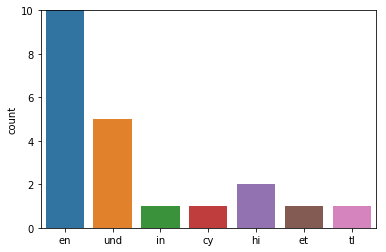

In [40]:
sns.countplot(language)
plt.ylim([0,10])

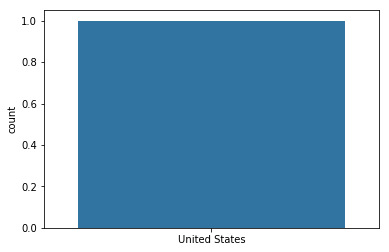

In [41]:
sns.countplot(nations)

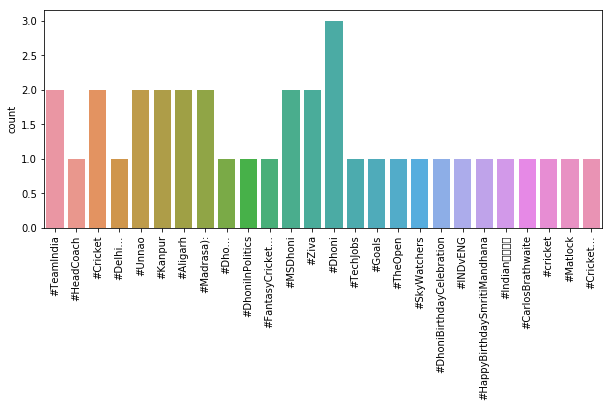

In [44]:
plt.figure(figsize=(10,4))
sns.countplot(hash_tags)
plt.xticks(rotation=90)
plt.show()